In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
from plotter import *
import glob, os
import seaborn as sb

In [2]:
def get_objective(conn):
    """
    Retrieves the objective function
    """
    cursor = conn.cursor()
    command = "SELECT * FROM Output_Objective"
    cursor.execute(command)
    obj_value = cursor.fetchall()[0][-1]
    
    return obj_value

In [3]:
path = 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/*.sqlite'
data_files = glob.glob(path, recursive=True)
data_files.sort()
data_files.append('simulations/illinois/zero_adv_nuclear/IL_ZAN_CC30_52.sqlite')
data_files

['simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W0_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W1_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W2_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W3_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W4_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W5_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W6_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W7_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W8_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S0_W9_52.sqlite',
 'simulations/illinois/zero_adv_nuclear_RE_sensitivity/data_files/IL_ZAN_S1_W0_52.sqlite',

In [4]:
region = 'IL'
comm = 'ELC'
frames = []
for file in data_files:
    conn = sqlite3.connect(file)
    df = get_annual_capacity(conn, region, comm)
    final_year = df[df.index==2050]
    final_year['Objective_Value'] = get_objective(conn)
    frames.append(final_year)
df = pd.concat(frames)

<ipython-input-4-310931bd8ef3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_year['Objective_Value'] = get_objective(conn)


In [5]:
df.fillna(0, inplace=True)
df

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
year,,,,,,,,
2050,5194.21020,2255.6,23456.967,688.8,12420.0,50566.800,29282.677,151025.624133
2050,2109.41180,2255.6,20395.856,688.8,12420.0,49767.729,34143.737,144134.489927
2050,522.70673,2255.6,37802.447,688.8,12420.0,68616.581,19882.699,147751.603159
2050,2119.88590,2255.6,27358.843,688.8,12420.0,44356.330,32613.658,145313.159880
2050,3519.48420,2255.6,24404.738,688.8,12420.0,40380.434,36528.467,150157.669494
...,...,...,...,...,...,...,...,...
2050,3625.51820,2255.6,23378.675,688.8,12420.0,62775.262,25669.011,149243.663441
2050,2851.69640,2255.6,28341.745,688.8,12420.0,68154.951,19155.395,146973.573350
2050,419.50085,2255.6,23016.828,688.8,12420.0,46790.378,37172.028,142721.440408


In [6]:
df.describe()

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
count,101.000000,1.010000e+02,101.000000,1.010000e+02,101.0,101.000000,101.000000,101.000000
mean,3156.567455,2.255600e+03,24219.650584,6.888000e+02,12420.0,49300.680604,30998.746168,146744.011065
std,1604.187639,4.113139e-12,4458.666869,1.371046e-12,0.0,8389.624085,5635.687332,3346.438552
min,259.982350,2.255600e+03,15930.131000,6.888000e+02,12420.0,27196.640000,18993.847000,138768.654400
25%,1797.727600,2.255600e+03,21514.036000,6.888000e+02,12420.0,44356.330000,27757.294000,144248.041146
50%,3154.465600,2.255600e+03,23323.459000,6.888000e+02,12420.0,49440.477000,30595.710000,146356.303996
75%,4013.339600,2.255600e+03,26185.832000,6.888000e+02,12420.0,54284.737000,34390.406000,149279.101176
max,6801.900400,2.255600e+03,40640.917000,6.888000e+02,12420.0,68616.581000,46026.601000,153298.108765


In [7]:
techs = list(df.columns[:-1])

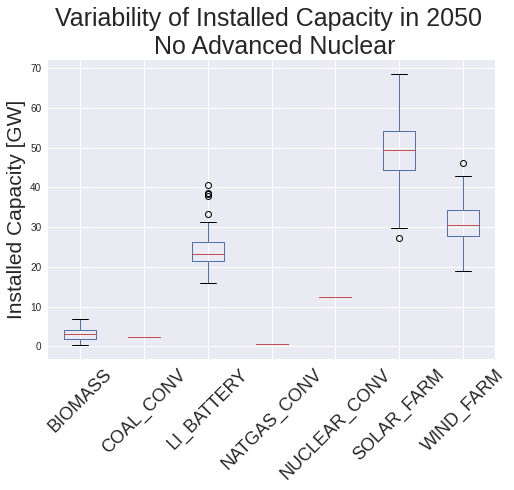

In [8]:
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
(df[techs]/1000).boxplot()

plt.title('Variability of Installed Capacity in 2050 \n No Advanced Nuclear', fontsize=25)
plt.ylabel('Installed Capacity [GW]', fontsize=21)
plt.xticks(fontsize=18, rotation=45)
plt.show()

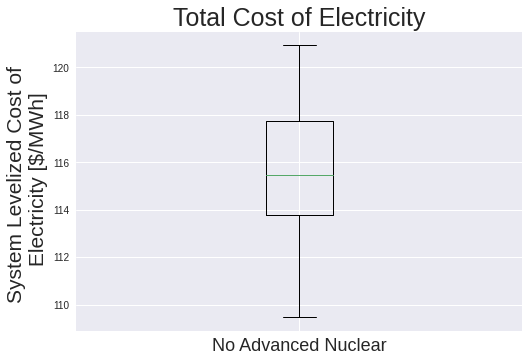

In [9]:
demand = 1267698.8
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
plt.boxplot(df['Objective_Value']/demand*1000)

plt.title('Total Cost of Electricity', fontsize=25)
plt.ylabel('System Levelized Cost of \n Electricity [$/MWh]', fontsize=21)
plt.xticks([1],['No Advanced Nuclear'],fontsize=18)
plt.show()

In [21]:
(df[techs]/1000).to_csv('data/results/installed_capacity_2050_ZAN.csv')

In [10]:
df = df.reset_index().drop(columns='year')

In [11]:
(df['Objective_Value']).to_csv('data/objective_value_ZAN.csv')

<AxesSubplot:>

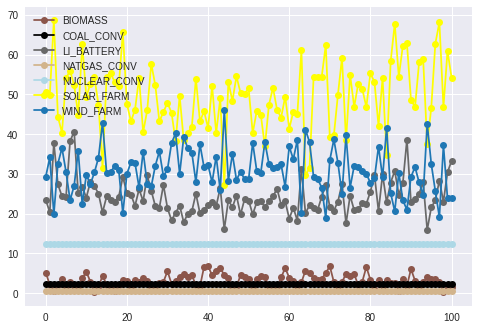

In [12]:
(df[techs]/1000).plot(marker='o', color=elc_colors)

The plot above suggests that biomass is useful when there is slightly less penetration of VREs. Biomass serves as baseload power and is relatively inflexible.

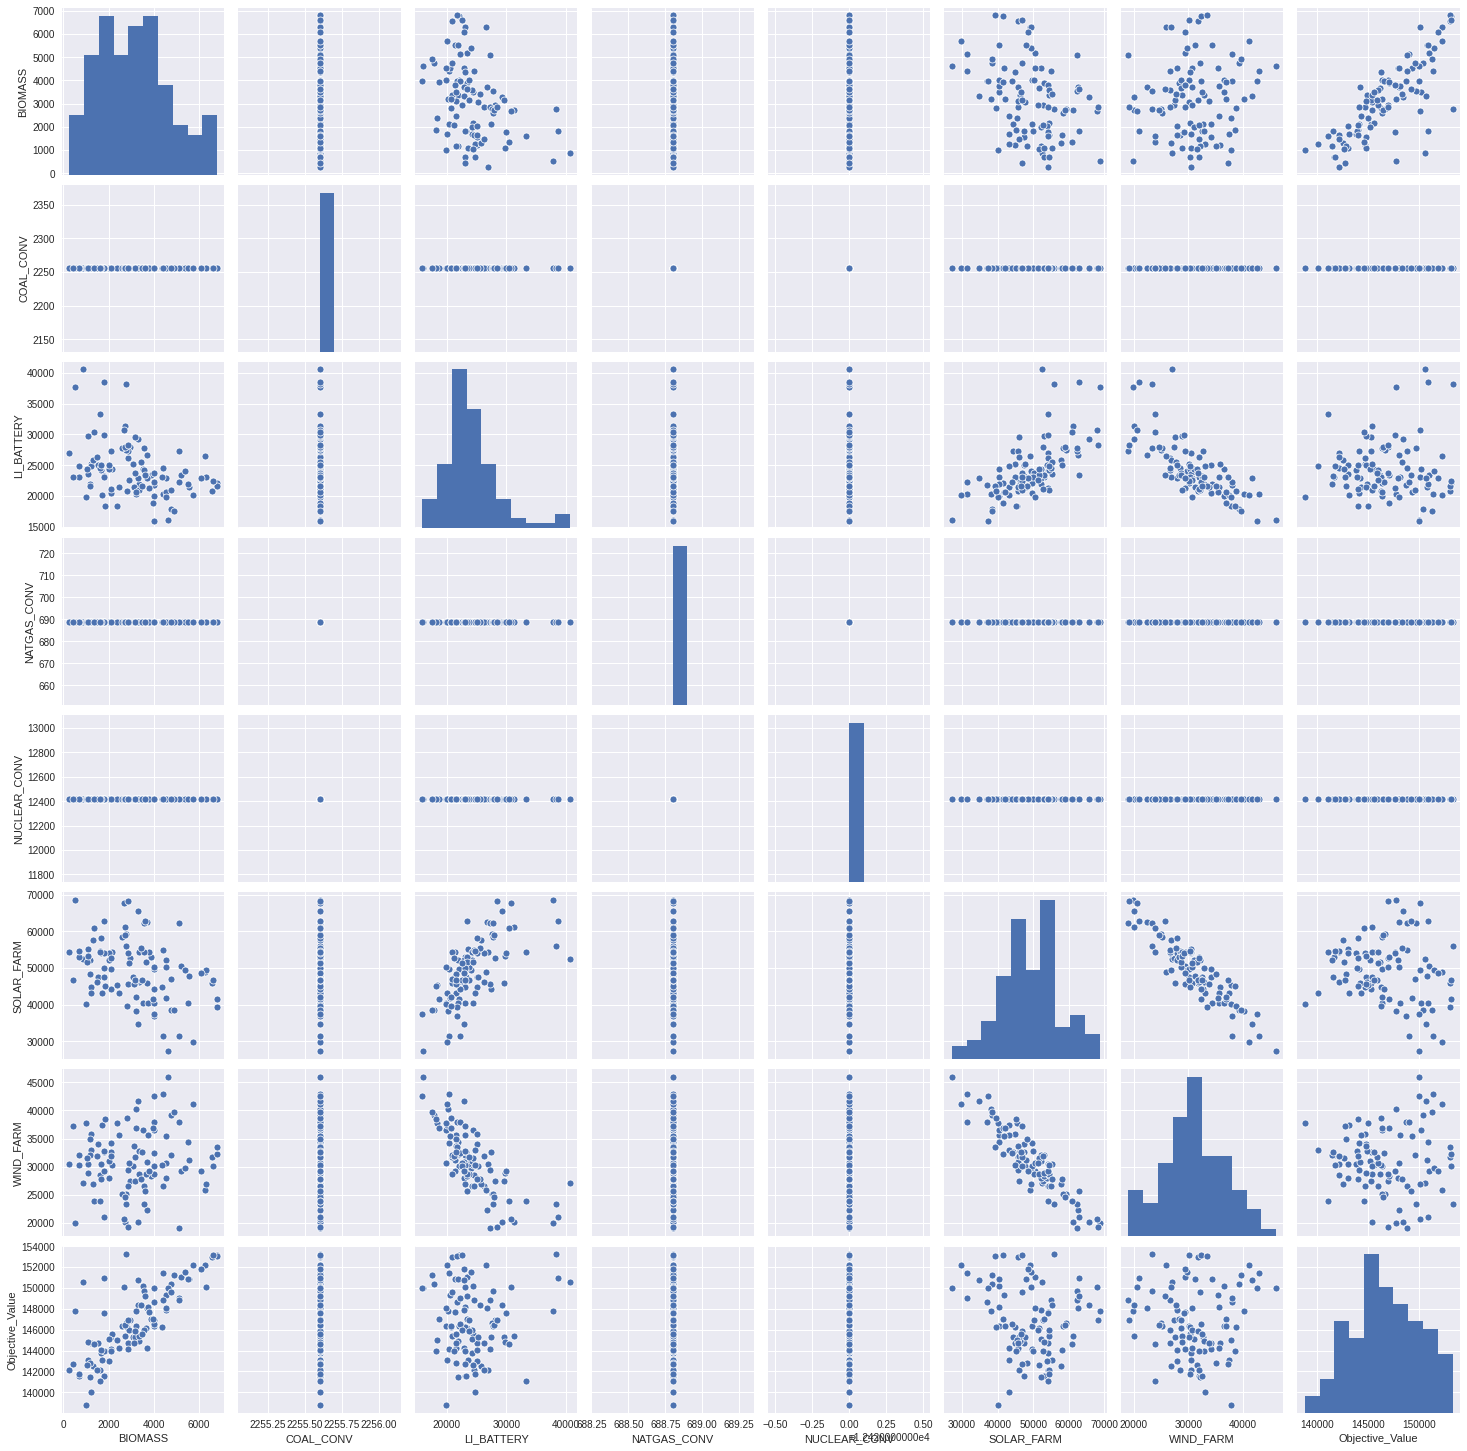

In [13]:
sb.pairplot(df)

In [14]:
conn = sqlite3.connect(data_files[0])
fulldf = get_annual_capacity(conn, region, comm)
for i,file in enumerate(data_files):
    if i == 0:
        continue
    conn = sqlite3.connect(file)
    inter_df = get_annual_capacity(conn, region, comm)
    frames = [fulldf, inter_df]
    fulldf = pd.concat(frames)

In [15]:
fulldf.fillna(0, inplace=True)
fulldf

,BIOMASS,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM
year,,,,,,,
2025,0.0000,7505.90,128.100,16371.60,12420.0,4330.0045,7778.2881
2030,5194.2102,5045.24,12895.163,16332.70,12420.0,29923.5040,21791.5500
2035,5194.2102,2815.74,14913.047,15903.98,12420.0,35320.2880,23993.8340
2040,5194.2102,2444.40,17923.470,5023.32,12420.0,42230.5950,24692.2550
2045,5194.2102,2357.04,20752.863,688.80,12420.0,47307.5690,26471.3750
...,...,...,...,...,...,...,...
2030,1601.7754,5045.24,22832.196,16332.70,12420.0,37965.2990,16659.2210
2035,1601.7754,2815.74,25443.894,15903.98,12420.0,42049.0110,18444.6810
2040,1601.7754,2444.40,28055.513,5023.32,12420.0,46132.5130,20230.4370


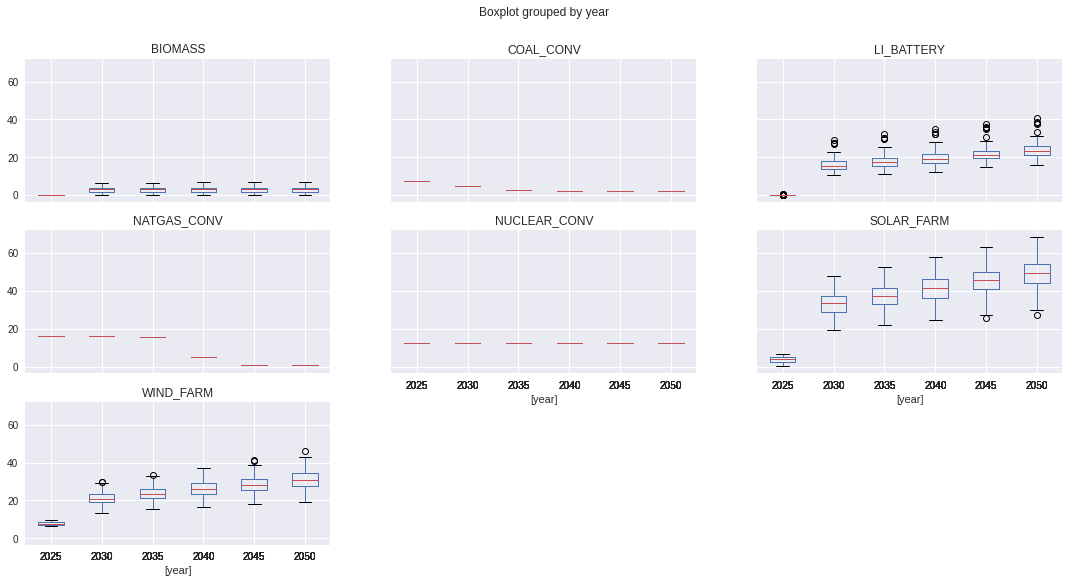

In [16]:
(fulldf/1000).boxplot(by='year', figsize=(18,9))
plt.xlabel('Installed Capacity [GW]')
plt.show()

In [17]:
conn = sqlite3.connect('simulations/illinois/zero_adv_nuclear/IL_ZAN_CC30_52.sqlite')

In [18]:
get_objective(conn)

141064.84056119845

In [20]:
(fulldf[techs]/1000).to_csv('data/results/installed_capacity_full_ZAN.csv')